# Scrapping Data from json file
    

In [1]:
# Import all necessary libraries
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
input_file_name = 'train_ham_scraped.json'
output_file_name = 'train_ham_raw.csv'

In [3]:
# Open json file
with open(input_file_name) as json_file:
    data = json.load(json_file)

print(data)

{'newspapers': {'newyorktimes_business': {'rss': 'http://rss.nytimes.com/services/xml/rss/nyt/Business.xml', 'link': 'https://www.nytimes.com/section/business', 'articles': [{'link': 'https://www.nytimes.com/2018/03/24/technology/google-facebook-data-privacy.html?partner=rss&emc=rss', 'published': '2018-03-24T20:43:21', 'title': 'How Calls for Privacy May Upend Business for Facebook and Google', 'text': "There are other avenues still, said Jascha Kaykas-Wolff, the chief marketing officer of Mozilla, the nonprofit organization behind the popular Firefox browser, including advertisers and large tech platforms collecting vastly less user data and still effectively customizing ads to consumers.\n\n“They are just collecting all the data to try to find magic growth algorithms,” Mr. Kaykas-Wolff said of online marketers. This past week, Mozilla halted its ads on Facebook, saying the social network’s default privacy settings allowed access to too much data.\n\nThe greatest likelihood is that t

In [4]:
# Data from json file is an dictionary.
# In each dictionary, there were three keys. So the values are stored into three lists.
news_source = []
news_values = []

for key, value in data.items():
    news_source.append(key)
    news_values.append(value)

print('news_source are : {}'.format(news_source))

news_source are : ['newspapers']


In [5]:
# news_values is an list of dictinaries. 
# From each dictionary, the values are stored into three lists as there were three keys.
news_sections = []
section_values = []

for data in news_values:
    news_sections.append(data.keys())
    section_values.append(data.values())

print('news_sections are : {}'.format(news_sections))

news_sections are : [dict_keys(['newyorktimes_business', 'newyorktimes_science', 'newyorktimes_technology', 'cnnmoney', 'marketwatch_newsletters', 'marketwatch_stories', 'cnbc_top_news', 'cnbc_investing', 'marketwatch', 'fox_business_latest_headlines', 'fox_business_opinion', 'entrepreneur_latest', 'entrepreneur_marketing', 'reuters_money', 'reuters_science', 'sciencedaily', 'economist_business', 'economist_science_and_tech', 'fivethirtyeight_science', 'fivethirtyeight_economics', 'nbpostgazette', 'journalismday', 'satprnews', 'insidertradings', 'truthfulreporter', 'highlandmirror', 'thefinancialanalyst', 'reportagestuff', 'tokenfolks', 'heraldanalyst', 'findmarketresearch'])]


In [6]:
rss = []
links=[]
articles = []

for values in section_values:
    for value in values:
        rss.append(value['rss'])
        links.append(value['link'])
        articles.append(value['articles'])   

print('rss e.g: {}'.format(rss[0]))
print('links e.g: {}'.format(links[0]))
print('articles e.g: {}'.format(articles[0]))

rss e.g: http://rss.nytimes.com/services/xml/rss/nyt/Business.xml
links e.g: https://www.nytimes.com/section/business
articles e.g: [{'link': 'https://www.nytimes.com/2018/03/24/technology/google-facebook-data-privacy.html?partner=rss&emc=rss', 'published': '2018-03-24T20:43:21', 'title': 'How Calls for Privacy May Upend Business for Facebook and Google', 'text': "There are other avenues still, said Jascha Kaykas-Wolff, the chief marketing officer of Mozilla, the nonprofit organization behind the popular Firefox browser, including advertisers and large tech platforms collecting vastly less user data and still effectively customizing ads to consumers.\n\n“They are just collecting all the data to try to find magic growth algorithms,” Mr. Kaykas-Wolff said of online marketers. This past week, Mozilla halted its ads on Facebook, saying the social network’s default privacy settings allowed access to too much data.\n\nThe greatest likelihood is that the internet companies, frightened by the 

In [7]:
# articles is an list of dictinaries. 
# From each dictionary, the values are stored into four lists as there were four keys.
article_links = []
article_published = []
article_titles = []
article_texts = []
article_authors = []
for article in articles:
    for data in article:
        article_links.append(data['link'])
        article_published.append(data['published'])
        article_titles.append(data['title'])
        article_texts.append(data['text'])
        article_authors.append(data['author'])

print('article_links: {}'.format(article_links[0]))
print('article_published: {}'.format(article_published[0]))
print('article_titles: {}'.format(article_titles[0]))
print('article_author: {}'.format(article_authors[0]))
print('article_text: {}'.format(article_texts[0]))

article_links: https://www.nytimes.com/2018/03/24/technology/google-facebook-data-privacy.html?partner=rss&emc=rss
article_published: 2018-03-24T20:43:21
article_titles: How Calls for Privacy May Upend Business for Facebook and Google
article_author: ['David Streitfeld', 'Natasha Singer', 'Steven Erlanger']
article_text: There are other avenues still, said Jascha Kaykas-Wolff, the chief marketing officer of Mozilla, the nonprofit organization behind the popular Firefox browser, including advertisers and large tech platforms collecting vastly less user data and still effectively customizing ads to consumers.

“They are just collecting all the data to try to find magic growth algorithms,” Mr. Kaykas-Wolff said of online marketers. This past week, Mozilla halted its ads on Facebook, saying the social network’s default privacy settings allowed access to too much data.

The greatest likelihood is that the internet companies, frightened by the tumult, will accept a few more rules and work a 

In [8]:
# Make final list of authors from article_author. article_author is a list of authors.
# From each list of authors, author name is extracted.
article_author_final = []
for authors in article_authors:
    for author in authors:
        article_author_final.append(author)

print('Final author list: {}'.format(article_author_final[0:5]))

Final author list: ['David Streitfeld', 'Natasha Singer', 'Steven Erlanger', 'Emily Flitter', 'Keith Bradsher']


In [9]:
# Count the no of columns.
print('article_links length: {}'.format(len(article_links)))
print('article_texts lenght: {}'.format(len(article_texts)))

article_links length: 631
article_texts lenght: 631


In [10]:
# Convert ham data into dataframe.
data_new = pd.DataFrame({'URL':article_links, 'Articles':article_texts})

data_new.head(10)

URL  \
0  https://www.nytimes.com/2018/03/24/technology/...   
1  https://www.nytimes.com/2018/03/24/business/we...   
2  https://www.nytimes.com/2018/03/25/business/ch...   
3  https://www.nytimes.com/2018/03/24/business/jo...   
4  https://www.nytimes.com/2018/03/24/business/tr...   
5  https://www.nytimes.com/2018/03/23/upshot/glob...   
6  https://www.nytimes.com/2018/03/23/technology/...   
7  https://www.nytimes.com/2018/03/24/business/ec...   
8  https://www.nytimes.com/2018/03/23/technology/...   
9  https://www.nytimes.com/2018/03/23/business/tr...   

                                            Articles  
0  There are other avenues still, said Jascha Kay...  
1  And so Mr. Tran, who is in his mid-50s and spe...  
2  In that analogy, Mr. Guo will essentially beco...  
3  News of Mr. Williams’s likely selection was fi...  
4  What is increasingly clear to many on Capitol ...  
5  If you look at the international flow of money...  
6  In the United States, regulators have repeated...  
7  The Trump administration this week raised fear...  
8  Tech companies like Uber, Waymo and Lyft, as w...  
9  If the economy manages to expand for 16 more m...

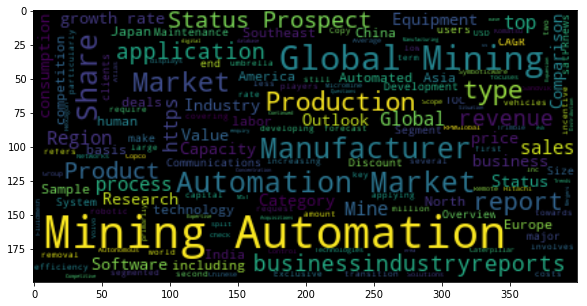

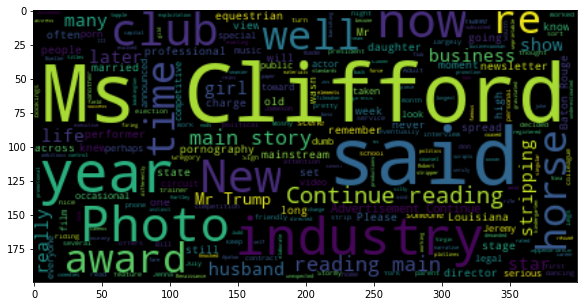

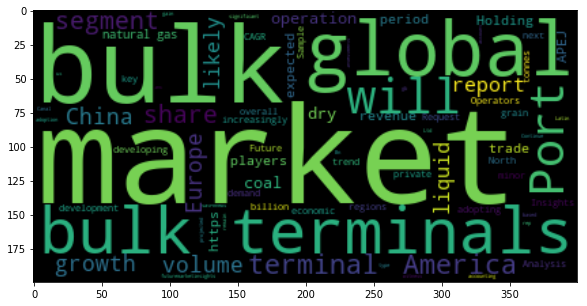

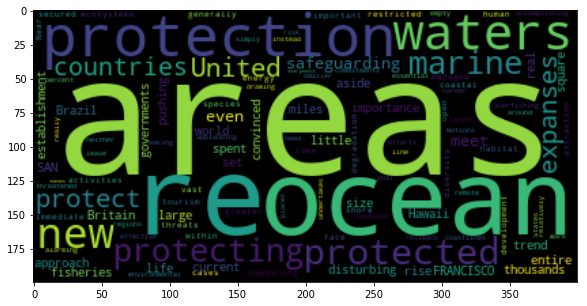

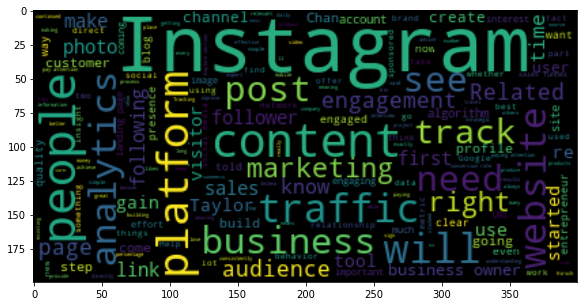

In [11]:
import random
# Create word clouds for random articles. Enter the value of count below.
count = 5

for x in range(count):
    y = random.randint(0, len(data_new)+1)    
    cloud = WordCloud(max_words = 600)
    cloud.generate(data_new['Articles'][y])

    plt.figure(figsize=(10,5))
    plt.imshow(cloud, interpolation = 'bilinear')
    plt.show()

In [12]:
# Save final ham_data to csv file for further processing.
data_new.to_csv(output_file_name, index=False)